```markdown
# Aleon - Desafio Técnico

API escolhida: Senado Federal
```


```markdown
# Script para Analisar a Quantidade de "Matérias Legislativas" que Cada Parlamentar Foi Autor

Nesse contexto, são exemplos de **"Matérias Legislativas"**:

1. Projetos de Lei (PL)
2. Projetos de Emenda à Constituição (PEC)
3. Projetos de Lei Complementar (PLC)
4. Propostas de Emenda à Constituição (PEC)
5. Requerimentos
6. Indicações
7. Moções
8. Vetos
9. Projetos de Decreto Legislativo (PDL)
10. Emendas
11. Relatórios
```


```markdown
# Importando as bibliotecas necessárias
```


In [2]:
import requests
import pandas as pd
import plotly.express as px


import seaborn as sns
import matplotlib.pyplot as plt


```markdown
# Fazendo a requisição para a api do senado
```


In [3]:
url = "https://legis.senado.leg.br/dadosabertos/autor/lista/atual"

request = requests.get(url=url, headers={"Accept": "application/json"})

```markdown
# Manipulando o Json retornado para conseguir acesso aos dados necessários
```


In [4]:
if request.status_code == 200:
    try:
        data = request.json()["ListaAutores"]["Autores"]["Autor"]
        df_parlamentar = pd.DataFrame(data)

    except Exception as e:
        print(f"Erro ao processar json: {e}")

```markdown
# Removendo colunas desnecessarias
```


In [5]:
# Removendo colunas desnecessarias
columns_to_remove = [
    "UrlPaginaParlamentar",
    "UrlFotoParlamentar",
    "UfParlamentar",
]
df_parlamentar = df_parlamentar.drop(columns=columns_to_remove)

df_parlamentar

,CodigoParlamentar,FormaTratamento,NomeParlamentar,QuantidadeMaterias
0,945,Senador,Alvaro Dias,120
1,5929,Senadora,Juíza Selma,43
2,5976,Senador,Eduardo Girão,532
3,5732,Senador,Rodrigo Pacheco,60
4,5905,Senador,Rodrigo Cunha,184
...,...,...,...,...
444,6599,Senador,Coronel Telhada,1
445,5743,Deputado,Delegado Éder Mauro,1
446,6551,Deputado,Coronel Meira,1
447,5706,Deputado,Evair Vieira de Melo,1


```markdown
# Renomeando colunas para melhor apresentação
```


In [6]:
columns_to_rename = {
    "FormaTratamento": "Título",
    "NomeParlamentar": "Nome",
    "QuantidadeMaterias": "Materiais",
    "CodigoParlamentar": "Código",
}
df_parlamentar = df_parlamentar.rename(columns=columns_to_rename)

df_parlamentar

,Código,Título,Nome,Materiais
0,945,Senador,Alvaro Dias,120
1,5929,Senadora,Juíza Selma,43
2,5976,Senador,Eduardo Girão,532
3,5732,Senador,Rodrigo Pacheco,60
4,5905,Senador,Rodrigo Cunha,184
...,...,...,...,...
444,6599,Senador,Coronel Telhada,1
445,5743,Deputado,Delegado Éder Mauro,1
446,6551,Deputado,Coronel Meira,1
447,5706,Deputado,Evair Vieira de Melo,1


```markdown
# Ordenando os parlamentares por quantidade de Matérias
```


In [7]:
df_parlamentar = df_parlamentar.sort_values(by="Materiais", ascending=False)

df_parlamentar

,Código,Título,Nome,Materiais
289,5385,Senador,Irajá,97
67,35,Senador,Jader Barbalho,96
339,4994,Senador,Eduardo Braga,92
287,5350,Senador,Jorginho Mello,90
11,5561,Senadora,Renilde Bulhões,9
...,...,...,...,...
294,5311,Deputado,Alessandro Molon,1
144,6494,Senador,Max Lemos,1
296,6245,Deputado,Alexandre Frota,1
141,4575,Senadora,Lídice da Mata,1


```markdown
# Substituindo valores NaN na coluna "Títulos" por "Sem título"
```


In [8]:
df_parlamentar["Título"] = df_parlamentar["Título"].fillna("Sem título")

df_parlamentar["Título"].filter(like="Sem título", axis=0)


# Para exemplicar a mudança
def highlight_sem_titulo(value):
    if value == "Sem título":
        return "background-color: yellow; color: red; font-weight: bold;"
    return ""


df_parlamentar.head(30).style.map(highlight_sem_titulo, subset=["Título"])

,Código,Título,Nome,Materiais
289,5385,Senador,Irajá,97
67,35,Senador,Jader Barbalho,96
339,4994,Senador,Eduardo Braga,92
287,5350,Senador,Jorginho Mello,90
11,5561,Senadora,Renilde Bulhões,9
192,6027,Sem título,Mecias de Jesus,9
428,6510,Deputada,Duda Salabert,9
297,6019,Senadora,Maria Eliza,9
77,6418,Deputado,Nikolas Ferreira,9
6,5236,Senador,Reguffe,89


```markdown
# Finalizações na tipagem dos dados
```


In [9]:
# Garantindo que a coluna tenha o tipo correto
df_parlamentar["Materiais"] = pd.to_numeric(df_parlamentar["Materiais"]).astype(int)

```markdown
# Análise sobre a quantidade de Materiais produzidos por cada Título de parlamentares
```


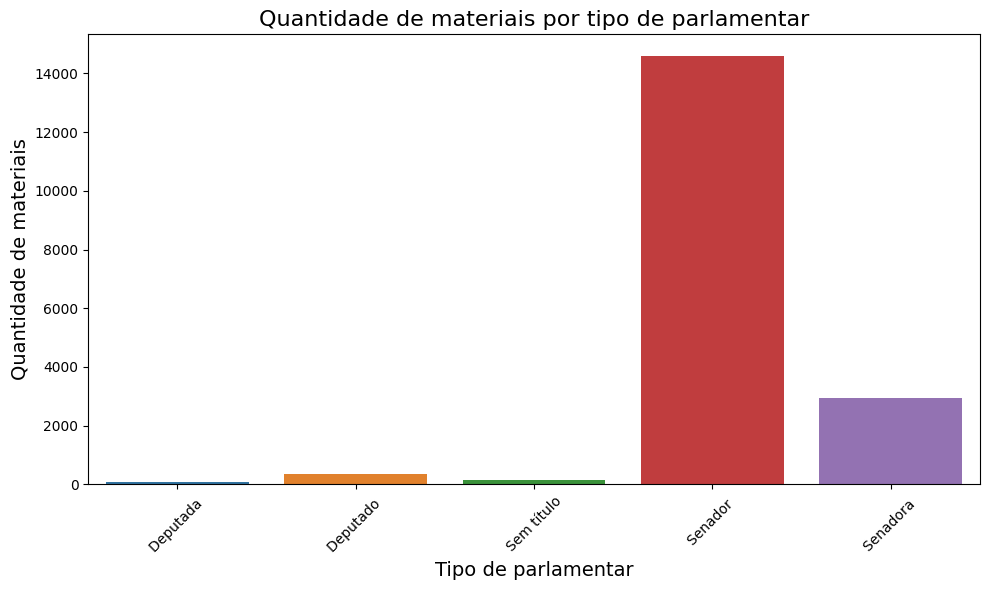

In [13]:
df_grouped = df_parlamentar.groupby("Título", as_index=False)["Materiais"].sum()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x="Título", y="Materiais")

plt.title("Quantidade de materiais por tipo de parlamentar", fontsize=16)
plt.xlabel("Tipo de parlamentar", fontsize=14)
plt.ylabel("Quantidade de materiais", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()